🧬 Lung Cancer scRNA-seq (GSE131907)

In [2]:
# Import libraries and Load the raw CSV file
import pandas as pd

df = pd.read_csv("GSE131907_Lung_Cancer_Feature_Summary.csv")

print(df.shape)
df.head()


(61, 12)


,Feature summary of the lung adenocarcinoma specimens and single-cell RNA sequencing data.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,Patient id,Samples,Tissue origins,Histology,Sex,Age,Smoking,Pathology,EGFR,Stages,No. of single-cells
2,1,P0001,LUNG_N01,nLung,ADC,Female,70,Never,MD,WT,IA,3194
3,2,P0006,LUNG_N06,nLung,ADC,Male,54,Ex,MD,na,IA,2839
4,3,P0008,LUNG_N08,nLung,ADC,Female,60,Never,MD,L858R,IB,3380


In [3]:
# Inspect raw column structure
print(df.columns)
df.info()


Index(['Feature summary of the lung adenocarcinoma specimens and single-cell RNA sequencing data.',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 12 columns):
 #   Column                                                                                     Non-Null Count  Dtype 
---  ------                                                                                     --------------  ----- 
 0   Feature summary of the lung adenocarcinoma specimens and single-cell RNA sequencing data.  60 non-null     object
 1   Unnamed: 1                                                                                 59 non-null     object
 2   Unnamed: 2                                                                                 59 non-null     object
 3

In [4]:
# Fix header and clean the dataset
import pandas as pd
import numpy as np

path = "GSE131907_Lung_Cancer_Feature_Summary.csv"
raw = pd.read_csv(path)

# Row 1 has the real headers
new_cols = raw.iloc[1].tolist()

# Data starts from row 2
df = raw.iloc[2:].copy()
df.columns = new_cols

# Drop completely empty rows (if any)
df = df.dropna(how="all")

# Clean whitespace in column names
df.columns = [str(c).strip() for c in df.columns]

# Convert numeric columns
if "Age" in df.columns:
    df["Age"] = pd.to_numeric(df["Age"], errors="coerce")

if "No. of single-cells" in df.columns:
    df["No. of single-cells"] = pd.to_numeric(df["No. of single-cells"], errors="coerce")

print("✅ Cleaned shape:", df.shape)
print("✅ Columns:", list(df.columns))
df.head()


✅ Cleaned shape: (59, 12)
✅ Columns: ['No', 'Patient id', 'Samples', 'Tissue origins', 'Histology', 'Sex', 'Age', 'Smoking', 'Pathology', 'EGFR', 'Stages', 'No. of single-cells']


,No,Patient id,Samples,Tissue origins,Histology,Sex,Age,Smoking,Pathology,EGFR,Stages,No. of single-cells
2,1,P0001,LUNG_N01,nLung,ADC,Female,70.0,Never,MD,WT,IA,3194.0
3,2,P0006,LUNG_N06,nLung,ADC,Male,54.0,Ex,MD,na,IA,2839.0
4,3,P0008,LUNG_N08,nLung,ADC,Female,60.0,Never,MD,L858R,IB,3380.0
5,4,P0009,LUNG_N09,nLung,ADC,Male,67.0,Ex,PD,WT,IIA,2528.0
6,5,P0018,LUNG_N18,nLung,ADC,Male,62.0,Ex,MD,del19,IA,4628.0


In [5]:
# Basic cohort overview
print("Unique patients:", df["Patient id"].nunique())
print("Unique samples:", df["Samples"].nunique())

# Clinical variable distributions
print("\nSex distribution:")
print(df["Sex"].value_counts(dropna=False))

print("\nStage distribution:")
print(df["Stages"].value_counts(dropna=False))

print("\nSmoking distribution:")
print(df["Smoking"].value_counts(dropna=False))

# Single-cell sequencing depth summary
print("\nSingle-cells per sample (summary):")
print(df["No. of single-cells"].describe())


Unique patients: 44
Unique samples: 58

Sex distribution:
Sex
Male      38
Female    20
NaN        1
Name: count, dtype: int64

Stage distribution:
Stages
IV      24
IA      14
IIIA     6
IB       5
IA3      4
IIA      2
IIB      2
IA2      1
NaN      1
Name: count, dtype: int64

Smoking distribution:
Smoking
Never    24
Ex       18
Cur      16
NaN       1
Name: count, dtype: int64

Single-cells per sample (summary):
count      58.000000
mean     3594.931034
std      1129.072634
min      1070.000000
25%      2995.750000
50%      3488.000000
75%      4370.750000
max      5798.000000
Name: No. of single-cells, dtype: float64


In [6]:
# Save the cleaned dataset
df.to_csv("GSE131907_clean_sample_summary.csv", index=False)
print("✅ Saved: GSE131907_clean_sample_summary.csv")


✅ Saved: GSE131907_clean_sample_summary.csv


1 Load both datasets

In [7]:
import pandas as pd
import numpy as np
import gzip
import os
import matplotlib.pyplot as plt


In [8]:
sample_df = pd.read_csv("GSE131907_clean_sample_summary.csv")
print("✅ Sample summary shape:", sample_df.shape)
sample_df.head()


✅ Sample summary shape: (59, 12)


,No,Patient id,Samples,Tissue origins,Histology,Sex,Age,Smoking,Pathology,EGFR,Stages,No. of single-cells
0,1,P0001,LUNG_N01,nLung,ADC,Female,70.0,Never,MD,WT,IA,3194.0
1,2,P0006,LUNG_N06,nLung,ADC,Male,54.0,Ex,MD,na,IA,2839.0
2,3,P0008,LUNG_N08,nLung,ADC,Female,60.0,Never,MD,L858R,IB,3380.0
3,4,P0009,LUNG_N09,nLung,ADC,Male,67.0,Ex,PD,WT,IIA,2528.0
4,5,P0018,LUNG_N18,nLung,ADC,Male,62.0,Ex,MD,del19,IA,4628.0


In [9]:
files_here = os.listdir(".")
print(files_here)


['.config', 'GSE131907_Lung_Cancer_Feature_Summary.csv', 'GSE131907_clean_sample_summary.csv', 'sample_data']


STEP 1 — Load the cleaned file

In [10]:
import pandas as pd

df = pd.read_csv("GSE131907_clean_sample_summary.csv")

print("Shape:", df.shape)
df.head()


Shape: (59, 12)


,No,Patient id,Samples,Tissue origins,Histology,Sex,Age,Smoking,Pathology,EGFR,Stages,No. of single-cells
0,1,P0001,LUNG_N01,nLung,ADC,Female,70.0,Never,MD,WT,IA,3194.0
1,2,P0006,LUNG_N06,nLung,ADC,Male,54.0,Ex,MD,na,IA,2839.0
2,3,P0008,LUNG_N08,nLung,ADC,Female,60.0,Never,MD,L858R,IB,3380.0
3,4,P0009,LUNG_N09,nLung,ADC,Male,67.0,Ex,PD,WT,IIA,2528.0
4,5,P0018,LUNG_N18,nLung,ADC,Male,62.0,Ex,MD,del19,IA,4628.0


STEP 2 — Sanity check

In [11]:
print(df.columns)
df.info()


Index(['No', 'Patient id', 'Samples', 'Tissue origins', 'Histology', 'Sex',
       'Age', 'Smoking', 'Pathology', 'EGFR', 'Stages', 'No. of single-cells'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   No                   59 non-null     object 
 1   Patient id           58 non-null     object 
 2   Samples              58 non-null     object 
 3   Tissue origins       58 non-null     object 
 4   Histology            58 non-null     object 
 5   Sex                  58 non-null     object 
 6   Age                  58 non-null     float64
 7   Smoking              58 non-null     object 
 8   Pathology            58 non-null     object 
 9   EGFR                 58 non-null     object 
 10  Stages               58 non-null     object 
 11  No. of single-cells  58 non-null     float64
dtypes: float64(2),

STEP 3 — Core project analysis

In [12]:
# 3.1 Patient & sample overview
print("Unique patients:", df["Patient id"].nunique())
print("Unique samples:", df["Samples"].nunique())


Unique patients: 44
Unique samples: 58


In [15]:
# 3.2 Clinical distributions
print("\nSex distribution")
print(df["Sex"].value_counts())

print("\nSmoking status")
print(df["Smoking"].value_counts())

print("\nCancer stage distribution")
print(df["Stages"].value_counts())



Sex distribution
Sex
Male      38
Female    20
Name: count, dtype: int64

Smoking status
Smoking
Never    24
Ex       18
Cur      16
Name: count, dtype: int64

Cancer stage distribution
Stages
IV      24
IA      14
IIIA     6
IB       5
IA3      4
IIA      2
IIB      2
IA2      1
Name: count, dtype: int64


STEP 4 — Visualization

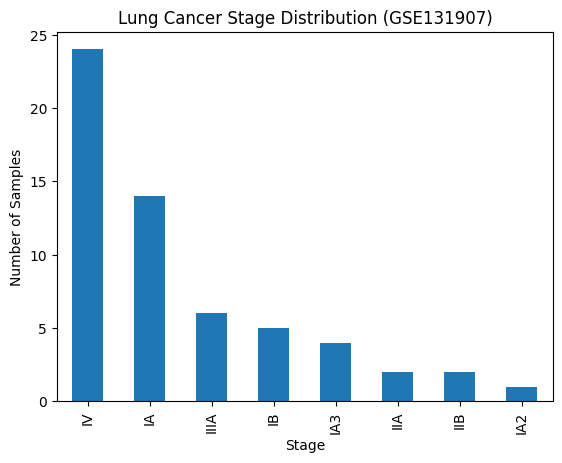

In [22]:
# 4.1 Stage distribution
import matplotlib.pyplot as plt

plt.figure()
df["Stages"].value_counts().plot(kind="bar")
plt.title("Lung Cancer Stage Distribution (GSE131907)")
plt.xlabel("Stage")
plt.ylabel("Number of Samples")
plt.show()



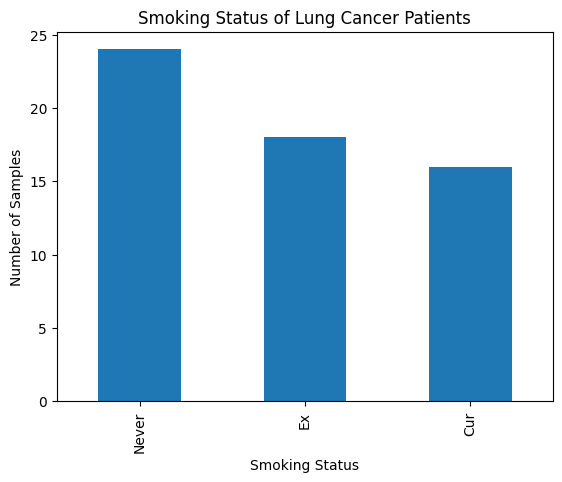

In [23]:
# 4.2 Smoking status
plt.figure()
df["Smoking"].value_counts().plot(kind="bar")
plt.title("Smoking Status of Lung Cancer Patients")
plt.xlabel("Smoking Status")
plt.ylabel("Number of Samples")
plt.show()


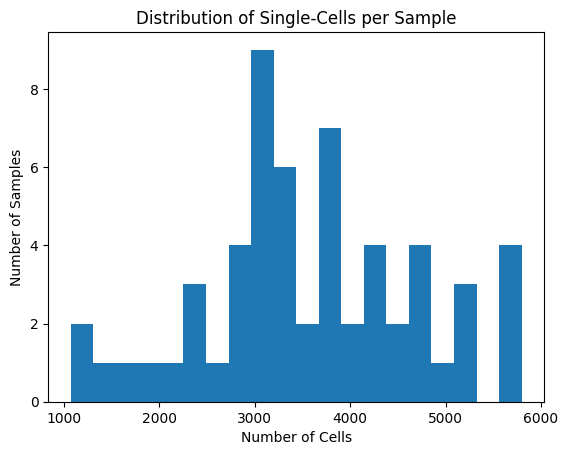

In [18]:
# 4.3 Single-cell yield per sample
plt.figure()
plt.hist(df["No. of single-cells"], bins=20)
plt.title("Distribution of Single-Cells per Sample")
plt.xlabel("Number of Cells")
plt.ylabel("Number of Samples")
plt.show()


In [19]:
# STEP 5 — Save final analysis-ready file
df.to_csv("GSE131907_final_clean_dataset.csv", index=False)
print("✅ Final dataset saved")


✅ Final dataset saved


STEP A — Show the missing issue clearly

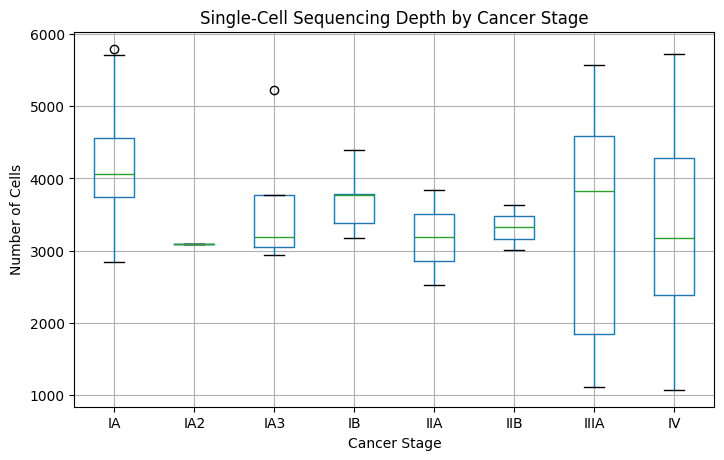

In [24]:
# Cells vs Stage
import matplotlib.pyplot as plt

df.boxplot(column="No. of single-cells", by="Stages", figsize=(8,5))
plt.title("Single-Cell Sequencing Depth by Cancer Stage")
plt.suptitle("")
plt.xlabel("Cancer Stage")
plt.ylabel("Number of Cells")
plt.show()


* Key Finding

This analysis reveals substantial variability in single-cell sequencing depth across lung cancer samples. Importantly, this variability exists even within the same cancer stage, indicating that sequencing depth is not uniform across clinically comparable patients.

* Why this matters

In single-cell RNA-seq studies, samples with higher numbers of sequenced cells can disproportionately influence downstream analyses. Without accounting for this imbalance, observed differences in tumor heterogeneity or immune composition may reflect technical variation rather than true biological differences.

* Recommendation

Future single-cell cancer studies should routinely report sequencing depth per sample and consider normalization strategies or minimum cell-count thresholds to reduce bias and improve reproducibility.